# Plotting

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from merging_data import *
import glob
import tarfile
import random

In [2]:
corpus_df = pd.read_csv("../incomplete_corpus_data/PotsdamSearchCorpus.dat", sep = "\t")
my_data = pd.read_csv("../separate_participant_data/raw/raw_subj_174.dat", sep = ",", dtype={'identifier': str})

In [3]:
subj = int((my_data['identifier'].iloc[0])[0:3])
corpus = corpus_df[corpus_df.subject == subj]

In [4]:
corpus_nonan = corpus[corpus.sacno.notnull()] 
corpus_nonan = corpus_nonan[corpus_nonan.fixno.notnull()] 

In [5]:
corpus_nonan

,subject,colorimages,trialno,trialstart,trialend,imagestart,imageend,imageno,filtertype,filterregion,...,fixposy,fixinvalid,sacno,saconset,sacoffset,sacdur,velpeak,amplitude,sacinvalid,glissade_handled
281617,174,1,1,8707413,8719766,8710926,8719651,32,2,1,...,14.39,0,1.0,261.0,279.0,19.0,251.37,3.02,0,0
281618,174,1,1,8707413,8719766,8710926,8719651,32,2,1,...,11.62,0,2.0,673.0,703.0,31.0,249.81,3.28,0,0
281619,174,1,1,8707413,8719766,8710926,8719651,32,2,1,...,12.15,0,3.0,1012.0,1041.0,30.0,215.71,2.24,0,0
281620,174,1,1,8707413,8719766,8710926,8719651,32,2,1,...,13.80,0,4.0,1215.0,1267.0,53.0,438.88,6.66,0,0
281621,174,1,1,8707413,8719766,8710926,8719651,32,2,1,...,17.96,0,5.0,1531.0,1568.0,38.0,322.13,3.91,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283211,174,1,120,10140241,10153903,10143809,10153787,30,2,1,...,7.04,0,30.0,8242.0,8271.0,30.0,233.76,2.75,0,0
283212,174,1,120,10140241,10153903,10143809,10153787,30,2,1,...,5.36,0,31.0,8819.0,8854.0,36.0,197.11,2.39,0,0
283213,174,1,120,10140241,10153903,10143809,10153787,30,2,1,...,5.26,0,32.0,9208.0,9280.0,73.0,521.59,11.97,0,0
283214,174,1,120,10140241,10153903,10143809,10153787,30,2,1,...,16.22,0,33.0,9508.0,9566.0,59.0,486.00,7.41,0,0


In [6]:
im = random.choice(np.unique(corpus_nonan.imageno))
im = 44

In [7]:
fix_data = my_data[(my_data.imageno==im) & (my_data.is_saccade==0)]
sac_data = my_data[(my_data.imageno==im) & (my_data.is_saccade==1)]

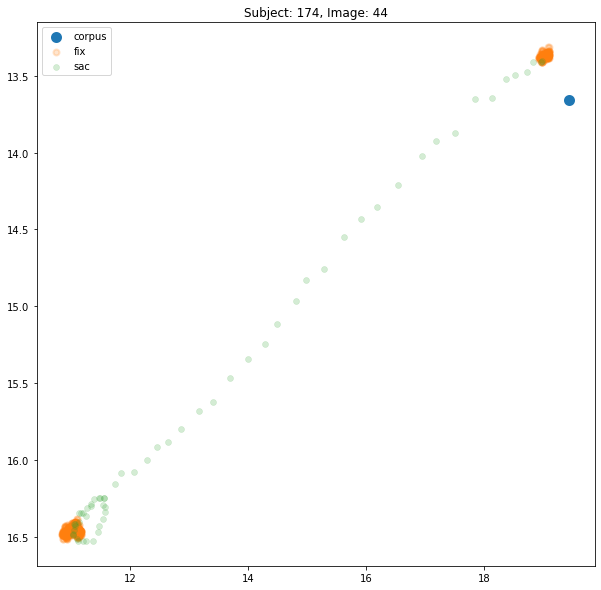

In [8]:
c = corpus_nonan[corpus_nonan.imageno==im]
plt.figure(figsize = (10,10))
plt.scatter(c.fixposx,c.fixposy, label = "corpus", linewidth = 5)
plt.scatter(fix_data.x,fix_data.y, alpha = 0.2, label = "fix", linewidth = 2)
plt.scatter(sac_data.x,sac_data.y, alpha = 0.2, label = "sac", linewidth = 0.5)
plt.gca().invert_yaxis()
plt.title("Subject: {}, Image: {}".format(subj,im))
plt.legend()

In [15]:
c_im = corpus_df[(corpus_df.subject == 174) & (corpus_df.imageno == im)]

In [16]:
im

44

In [17]:
c_im ["fixposx"]


282572    19.44
282573    11.25
Name: fixposx, dtype: float64

In [18]:
c_im ["fixposy"]


282572    13.66
282573    16.82
Name: fixposy, dtype: float64

In [19]:
c_im

,subject,colorimages,trialno,trialstart,trialend,imagestart,imageend,imageno,filtertype,filterregion,...,fixposy,fixinvalid,sacno,saconset,sacoffset,sacdur,velpeak,amplitude,sacinvalid,glissade_handled
282572,174,1,75,9611273,9615576,9614730,9615459,44,2,2,...,13.66,0,1.0,195.0,255.0,61.0,376.26,8.87,0,0
282573,174,1,75,9611273,9615576,9614730,9615459,44,2,2,...,16.82,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [14]:
c

,subject,colorimages,trialno,trialstart,trialend,imagestart,imageend,imageno,filtertype,filterregion,...,fixposy,fixinvalid,sacno,saconset,sacoffset,sacdur,velpeak,amplitude,sacinvalid,glissade_handled
282572,174,1,75,9611273,9615576,9614730,9615459,44,2,2,...,13.66,0,1.0,195.0,255.0,61.0,376.26,8.87,0,0
